In [4]:
import pandas as pd
from sklearn import linear_model
import pandas
from sklearn.model_selection import KFold
import numpy as np
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error,mean_absolute_error

In [3]:
df = pd.read_excel("pm_nasa.xlsx")

In [5]:
df.tail(5)

,StationNum,GMT,AQS,LAT,LON,YEAR,MONTH,DAY,MODHR,TAU,...,PM24H,RUCHR,RUCPIX,TMP,RH,WS10m,WS925,HPBL,PRS,VIS
23277,320,-5,371170001,35.81,-76.90,2006,12,30,15.25,0.07,...,10.67,15,6,280.12,88.94,0.93,6.11,124.83,1033.20,9.34
23278,344,-5,371910005,35.37,-77.99,2006,12,30,16.83,0.10,...,13.08,17,8,286.85,57.07,2.21,3.01,290.00,1028.37,20.85
23279,320,-5,371170001,35.81,-76.90,2006,12,31,15.92,0.17,...,13.38,16,6,287.57,55.72,3.08,0.88,442.83,1028.75,21.33
23280,330,-5,371290002,34.36,-77.84,2006,12,31,15.92,0.12,...,8.96,16,5,290.58,65.91,2.95,7.67,575.80,1027.60,15.76
23281,250,-6,280110001,33.75,-90.72,2006,12,31,17.58,0.11,...,5.38,18,6,288.20,65.30,5.93,8.69,872.67,1011.98,17.03


In [6]:
x1 = pd.DataFrame(df['TAU'])
x2 = pd.DataFrame(df[['TAU', 'TMP']])
x3 = pd.DataFrame(df[['TAU', 'TMP','RH']])
x4 = pd.DataFrame(df[['TAU', 'RH','TMP','HPBL']])
x5 = pd.DataFrame(df[['TAU', 'RH','TMP','HPBL','WS10m']])
x6 = pd.DataFrame(df[['TAU', 'RH','TMP','HPBL','WS10m','CLOUD']])

y = pd.DataFrame(df['PM24H'])

In [40]:

# x = pd.DataFrame(df[['TAU', 'RH','TMP','HPBL','WS10m','CLOUD']])

# y = pd.DataFrame(df['PM24H'])

In [7]:
from scipy.stats import pearsonr
def train_model(features,y):
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(features, y, test_size = 0.2, random_state = 0)
    regression_model = linear_model.LinearRegression()
    regression_model.fit(X_train, y_train)
    predictions = sklearn.model_selection.cross_val_predict(regression_model,X_test,y_test,cv=5)
    r2 = pearsonr(y_test,predictions)[0]
    mae = mean_absolute_error(y_test,predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    # data points
#     fig, axs = plt.subplots(3, 2)
    fig = plt.figure()
    plt.scatter(y_test, predictions, s=10)
    plt.xlabel('Observed PM2.5 in μg/m\u00b3')
    plt.ylabel('Estimated PM2.5 in μg/m\u00b3')
    # predicted values
    t = np.linspace(0, y_test.max(), 10)
    plt.plot(t, t, color='r')
    # plt.show()|
    return r2,rmse,mae

R-value:  [0.57416266] RMSE:  6.18766419491475 MAE:  4.629146061297168


R-value:  [0.62552763] RMSE:  5.8964025330521155 MAE:  4.375882874310509


R-value:  [0.62707815] RMSE:  5.8869896418103655 MAE:  4.373250031127722


R-value:  [0.63473666] RMSE:  5.839923966515219 MAE:  4.320366342577505


R-value:  [0.65937523] RMSE:  5.681864279310037 MAE:  4.1694876204849285


R-value:  [0.66332683] RMSE:  5.655539157678682 MAE:  4.14893025103952




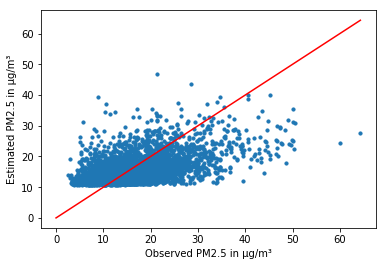

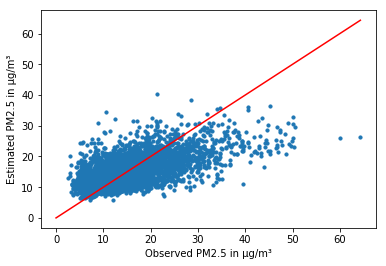

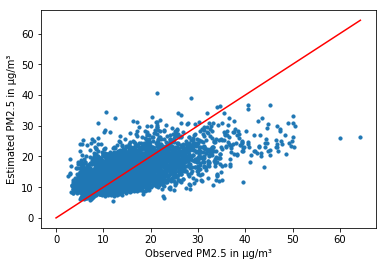

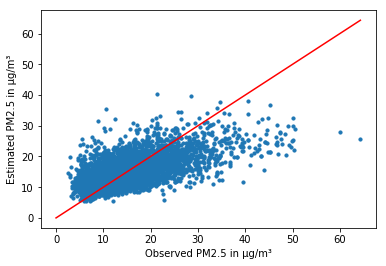

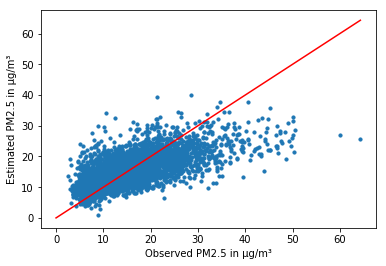

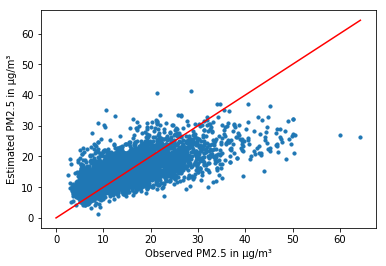

In [8]:
x = [x1,x2,x3,x4,x5,x6]
for i in range(len(x)):
    score,rmse,mae = train_model(x[i],y)
    print("R-value: ",score,"RMSE: ",rmse,"MAE: ",mae)
    print("\n")

In [4]:
spring = df[df['MONTH'].isin([3,4,5])]
summer = df[df['MONTH'].isin([6,7,8])]
fall = df[df['MONTH'].isin([9,10,11])]
winter = df[df['MONTH'].isin([12,1,2])]

In [8]:
fall.shape

(6366, 23)

(0.3912844551328143, 5.8964025330521155)

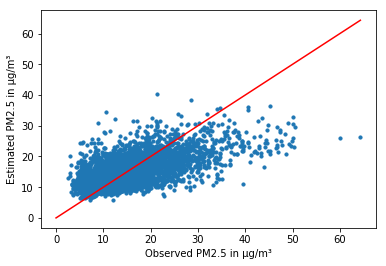

In [48]:
score,rmse = train_model(x2,y)
score,rmse

In [ ]:
score,rmse = train_model(x,y)
score,rmse

In [ ]:
score,rmse = train_model(x1,y)
score,rmse

In [14]:
predictions[0:5]

array([[15.65024472],
       [13.78728084],
       [10.05289109],
       [ 9.47495201],
       [17.32233465]])

Text(0, 0.5, 'Predictions')

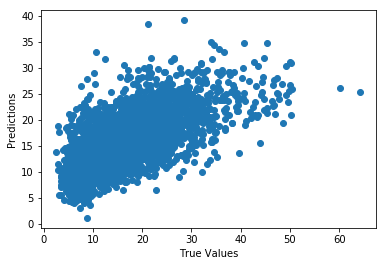

In [16]:
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [17]:
regression_model.score(X_test,y_test)

0.438682370683972

In [65]:
regression_model = linear_model.LinearRegression()
scores = cross_val_score(regression_model, x, y, cv=5)


In [66]:
list(scores)

[0.3877617939285911,
 0.338421386580699,
 0.37916415604597425,
 0.44430114818497823,
 0.40005497032673476]

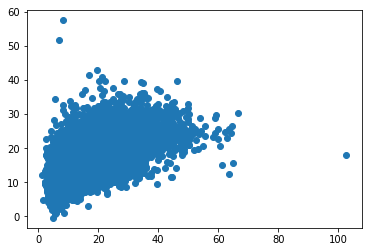

In [48]:
predictions = sklearn.model_selection.cross_val_predict(regression_model,x,y,cv=5)
plt.scatter(y,predictions)

In [50]:
sklearn.metrics.r2_score(y,predictions)

0.4139346876761292

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C9DCBCDC18>,
      dtype=object)

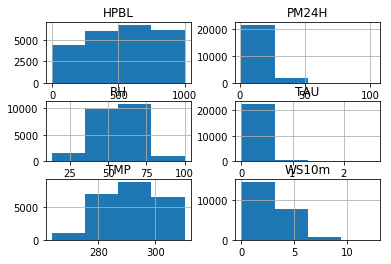

In [33]:
df1 = df[['TAU','PM24H','TMP','RH','HPBL','WS10m']]
df1.hist(bins=4)
# df['PM24H'].hist(bins=4)
# df['TMP'].hist(bins=4)
# df['RH'].hist(bins=4)

Slope: [[22.49910348]]
Intercept: [11.03622993]
Root mean squared error:  38.33489089546967
R2 score:  0.32882715674485585


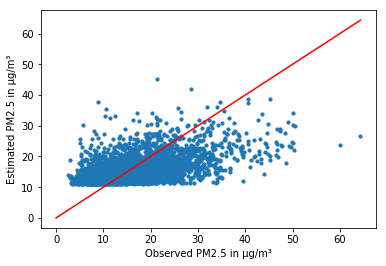

In [33]:
import numpy as np
from sklearn.linear_model import LinearRegression
, r2_score
import sklearn


# generate random data-set
np.random.seed(0)
# x = pd.DataFrame(df[['TAU', 'RH','TMP','HPBL','WS10m','CLOUD']])
x=  pd.DataFrame(df['TAU'])
y = pd.DataFrame(df['PM24H'])

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.2, random_state = 0)

# sckit-learn implementation

# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(X_train, y_train)
# Predict
y_predicted = regression_model.predict(X_test)

# model evaluation
mse = mean_squared_error(y_test, y_predicted)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# plotting values

# data points
plt.scatter(y_test, y_predicted, s=10)
plt.xlabel('Observed PM2.5 in μg/m\u00b3')
plt.ylabel('Estimated PM2.5 in μg/m\u00b3')

# predicted values
t = np.linspace(0, y_test.max(), 10)
plt.plot(t, t, color='r')
# plt.show()|

Slope: [[ 1.59472688e+01 -4.35072591e-02  2.61970593e-01 -1.80879878e-03
  -7.65309206e-01 -4.19783460e-02]]
Intercept: [-58.30456101]
Root mean squared error:  32.06037057931678
R2 score:  0.438682370683972
R-value: 0.662331012926295


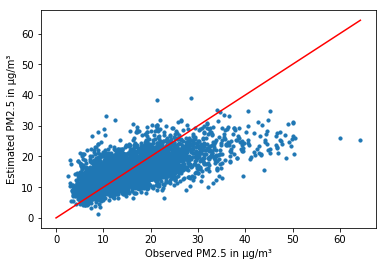

In [115]:
#MULTIPLE REGRESSION
import math

# generate random data-set
np.random.seed(0)
x = pd.DataFrame(df[['TAU', 'RH','TMP','HPBL','WS10m','CLOUD']])

y = pd.DataFrame(df['PM24H'])

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.2, random_state = 0)

# sckit-learn implementation

# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(X_train, y_train)
# Predict
y_predicted = regression_model.predict(X_test)

# model evaluation
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)
print('R-value:',math.sqrt(r2))

# plotting values

# data points
plt.scatter(y_test, y_predicted, s=10)
plt.xlabel('Observed PM2.5 in μg/m\u00b3')
plt.ylabel('Estimated PM2.5 in μg/m\u00b3')

t = np.linspace(0, y_test.max(), 10)
plt.plot(t, t, color='r')
# plt.show()

In [97]:
d1 = df.loc[df['StationNum'] == 18]
d1.head()

,StationNum,GMT,AQS,LAT,LON,YEAR,MONTH,DAY,MODHR,TAU,...,PM24H,RUCHR,RUCPIX,TMP,RH,WS10m,WS925,HPBL,PRS,VIS
1369,18,-6,10890014,34.69,-86.58,2004,3,22,16.58,0.04,...,7.29,17,4,279.57,41.41,5.02,8.85,251.00,1000.20,29.94
1414,18,-6,10890014,34.69,-86.58,2004,3,23,17.25,0.08,...,11.00,17,4,285.03,32.77,3.48,4.71,360.75,1000.90,37.26
1488,18,-6,10890014,34.69,-86.58,2004,3,25,17.08,0.15,...,17.25,17,4,294.47,50.53,4.76,7.91,162.50,1001.40,22.71
1515,18,-6,10890014,34.69,-86.58,2004,3,26,16.17,0.32,...,11.58,16,4,294.28,60.03,4.83,8.93,143.75,999.35,18.11
1557,18,-6,10890014,34.69,-86.58,2004,3,28,15.92,0.07,...,14.38,16,4,296.72,54.96,2.86,8.49,581.50,993.25,19.70


Slope: [[ 1.59472688e+01 -4.35072591e-02  2.61970593e-01 -1.80879878e-03
  -7.65309206e-01 -4.19783460e-02]]
Intercept: [-58.30456101]
Root mean squared error:  31.753157067903942
R2 score:  0.4651726402552947


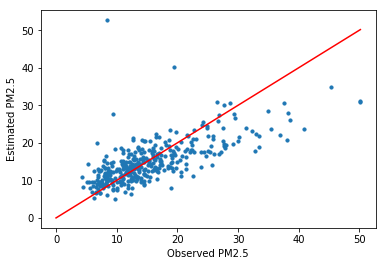

In [100]:
#Predict
x = pd.DataFrame(d1[['TAU', 'RH','TMP','HPBL','WS10m','CLOUD']])
y = d1['PM24H']
y_predicted = regression_model.predict(x)




# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# plotting values

# data points
plt.scatter(y, y_predicted, s=10)
plt.xlabel('Observed PM2.5 in μg/m\u00b3')
plt.ylabel('Estimated PM2.5 in μg/m\u00b3')

# predicted values
t = np.linspace(0, y.max(), 10)
plt.plot(t, t, color='r')
# plt.show()

In [101]:
d1.shape

(355, 23)

In [73]:
from scipy.stats import linregress

In [77]:
a = list(df['TAU'].values)
b = list(df['PM24H'].values)
linregress(a,b)

LinregressResult(slope=22.756035076199847, intercept=11.014390289589723, rvalue=0.553622734996213, pvalue=0.0, stderr=0.22434428331361628)

In [79]:
df1.corr()

,TAU,PM24H,TMP,RH,HPBL,WS10m
TAU,1.000000,0.553623,0.534821,0.281629,0.014602,-0.139001
PM24H,0.553623,1.000000,0.527427,0.133708,-0.000035,-0.284852
TMP,0.534821,0.527427,1.000000,0.223526,0.209034,-0.162217
RH,0.281629,0.133708,0.223526,1.000000,-0.233009,-0.076583
HPBL,0.014602,-0.000035,0.209034,-0.233009,1.000000,0.175562
WS10m,-0.139001,-0.284852,-0.162217,-0.076583,0.175562,1.000000


Slope: [ 1.14218515e+01 -3.27647471e-02  3.07833869e-01 -1.94243950e-03
 -7.46504868e-01 -3.12952950e-02]
Intercept: [-71.57581499]
Root mean squared error:  32.938707419511
R2 score:  0.4233043215856619


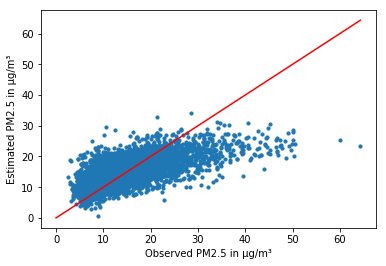

In [117]:
from sklearn import linear_model


#MULTIPLE REGRESSION
#Ridge

# generate random data-set
np.random.seed(0)
x = pd.DataFrame(df[['TAU', 'RH','TMP','HPBL','WS10m','CLOUD']])

y = pd.DataFrame(df['PM24H'])

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.2, random_state = 0)

# sckit-learn implementation

# Model initialization
regression_model = linear_model.Lasso(alpha=0.1)
# Fit the data(train the model)
regression_model.fit(X_train, y_train)
# Predict
y_predicted = regression_model.predict(X_test)

# model evaluation
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# plotting values

# data points
plt.scatter(y_test, y_predicted, s=10)
plt.xlabel('Observed PM2.5 in μg/m\u00b3')
plt.ylabel('Estimated PM2.5 in μg/m\u00b3')

t = np.linspace(0, y_test.max(), 10)
plt.plot(t, t, color='r')
# plt.show()